In [188]:
from bids import BIDSLayout
import matplotlib.pyplot as plt
from nilearn import datasets
import glob
import nibabel as nib
from nilearn import image
import numpy as np
from nilearn import plotting
from nilearn.image.image import mean_img
import pandas as pd

# BIDS Layout

In [189]:
layout = BIDSLayout('../data/BIDS/')
layout

BIDS Layout: ...scripts/../data/BIDS | Subjects: 1 | Sessions: 4 | Runs: 3

In [190]:
participants = layout.get(suffix='participants', extension='tsv')[0]
participants.get_df()

,participant_id,sexe,age_1,age_2,age_3,age_4,age_chx_1,t2d_1,type_chx_1,main_dominante_1,...,wl_recherche_3,wl_recherche_4,ewl_recherche_1,ewl_recherche_2,ewl_recherche_3,ewl_recherche_4,twl_recherche_1,twl_recherche_2,twl_recherche_3,twl_recherche_4
0,sub-RND-047,1,35.0,35.6,36.3,37.2,35.2,2,1,1,...,43.8,41.4,0,66.761191,95.248865,90.029749,0,27.682597,39.495041,37.330929
1,sub-RND-050,2,45.9,46.7,47.3,48.3,46.3,2,3,1,...,52.9,58.4,0,47.641376,79.502486,87.768340,0,24.980299,41.686367,46.020489


In [191]:
 bold_file = layout.get(subject=('RND050'), suffix='bold', extension=['nii', 'nii.gz'])[0]

In [192]:
md=bold_file.get_metadata()
md.keys()

dict_keys(['AcquisitionMatrixPE', 'AcquisitionNumber', 'AcquisitionTime', 'BodyPartExamined', 'CoilString', 'ConversionSoftware', 'ConversionSoftwareVersion', 'DeviceSerialNumber', 'EchoTime', 'EchoTrainLength', 'EstimatedEffectiveEchoSpacing', 'EstimatedTotalReadoutTime', 'FlipAngle', 'ImageOrientationPatientDICOM', 'ImageType', 'ImagingFrequency', 'InPlanePhaseEncodingDirectionDICOM', 'InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName', 'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturersModelName', 'Modality', 'ParallelReductionFactorInPlane', 'PatientPosition', 'PercentPhaseFOV', 'PercentSampling', 'PhaseEncodingAxis', 'PhaseEncodingSteps', 'PhilipsRescaleIntercept', 'PhilipsRescaleSlope', 'PhilipsScaleSlope', 'PixelBandwidth', 'ProtocolName', 'ReconMatrixPE', 'RepetitionTime', 'ScanOptions', 'ScanningSequence', 'SequenceVariant', 'SeriesDescription', 'SeriesNumber', 'SliceThickness', 'SoftwareVersions', 'SpacingBetweenSlices', 'StationNam

# Dataset setup

In [193]:
data = {'anat': glob.glob('../data/fmriprep/sub-RND050/anat/*MNI*preproc_T1w.nii.gz'),
        'func': glob.glob('../data/fmriprep/sub-RND050/ses-1/func/*run-1*bold.nii.gz'),
        'events': glob.glob('../data/sub-RND050/ses-1/func/*run-1_events.tsv'),
        'confounds': glob.glob('../data/fmriprep/sub-RND050/ses-1/func/*run-1*confounds*.tsv')}
data

{'anat': ['../data/fmriprep/sub-RND050/anat/sub-RND050_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'],
 'func': ['../data/fmriprep/sub-RND050/ses-1/func/sub-RND050_ses-1_task-BDM_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'],
 'events': ['../data/BIDS/sub-RND050/ses-1/func/sub-RND050_ses-1_task-BDM_run-1_events.tsv'],
 'confounds': ['../data/fmriprep/sub-RND050/ses-1/func/sub-RND050_ses-1_task-BDM_run-1_desc-confounds_timeseries.tsv']}

In [194]:
data.keys()

dict_keys(['anat', 'func', 'events', 'confounds'])

In [195]:
fmri_filepath = data["func"][0]
print(fmri_filepath)

../data/fmriprep/sub-RND050/ses-1/func/sub-RND050_ses-1_task-BDM_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz


In [196]:
fmri_img = nib.load(fmri_filepath)
print(fmri_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (97, 115, 97, 179)
affine:
[[   2.     0.     0.   -96.5]
 [   0.     2.     0.  -132.5]
 [   0.     0.     2.   -78.5]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  97 115  97 179   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   2.   2.   2.   2.75 1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 3917.2654
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by F

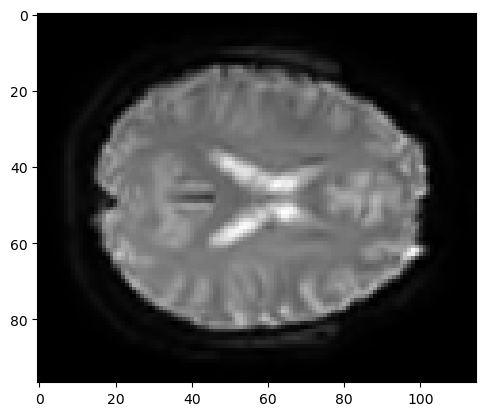

In [197]:
fmri_data = fmri_img.get_fdata()
plt.imshow(fmri_data[:,:,50,0], cmap='gray')

In [198]:
fmri_img= '../data/sub-RND050_ses-1_task-BDM_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'
vol = image.load_img(fmri_filepath)
vol = image.new_img_like(vol, np.int16(vol.get_fdata()))
vol.to_filename(fmri_img)

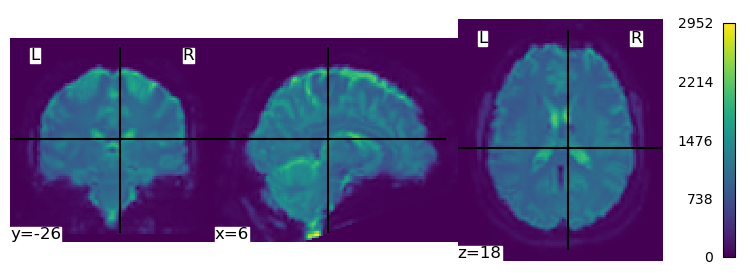

In [199]:
fmri_img_mean = mean_img(fmri_img)
plotting.plot_img(fmri_img_mean, colorbar=True, cbar_tick_format="%i")

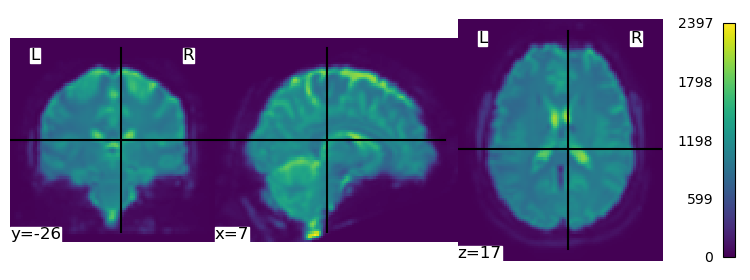

In [200]:
smooth_anat_img = image.smooth_img(fmri_img_mean, fwhm=3)
plotting.plot_img(smooth_anat_img, colorbar=True, cbar_tick_format="%i")

In [201]:
events = pd.read_table(data["events"][0])
events

,onset,duration,onset_bid,response_time,value,trial_type,stim_file
0,7.261,4.023,11.284,2.451,1.0,Lo,Raisins.jpg
1,18.785,4.023,22.808,2.247,1.5,Hi,SaltRuffles.bmp
2,29.492,4.023,33.515,2.778,4.0,Hi,SweetKitkat.bmp
3,40.533,4.023,44.556,2.770,4.0,Hi,SaltCheetos.bmp
4,51.541,4.023,55.564,1.594,3.0,Hi,Sweetmandm.bmp
5,61.999,4.023,66.022,2.647,2.5,Lo,Redpepper.bmp
6,73.306,4.023,77.329,3.810,0.5,Hi,SaltDoritos.bmp
7,85.579,4.023,89.602,2.506,1.5,Lo,Carottes.jpg
8,96.354,4.023,100.377,1.596,2.5,Hi,Sweetm&mamandes.bmp
9,106.612,4.023,110.636,2.320,1.5,Hi,SweetMaynardspeaches.bmp


# GLM 1st level

In [202]:
from nilearn.glm.first_level import FirstLevelModel

In [203]:
fmri_glm = FirstLevelModel(
    t_r=2.75,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

In [204]:
fmri_glm = fmri_glm.fit(fmri_img, events)

/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'value' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'onset_bid' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:75: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might n

In [205]:
design_matrix = fmri_glm.design_matrices_[0]

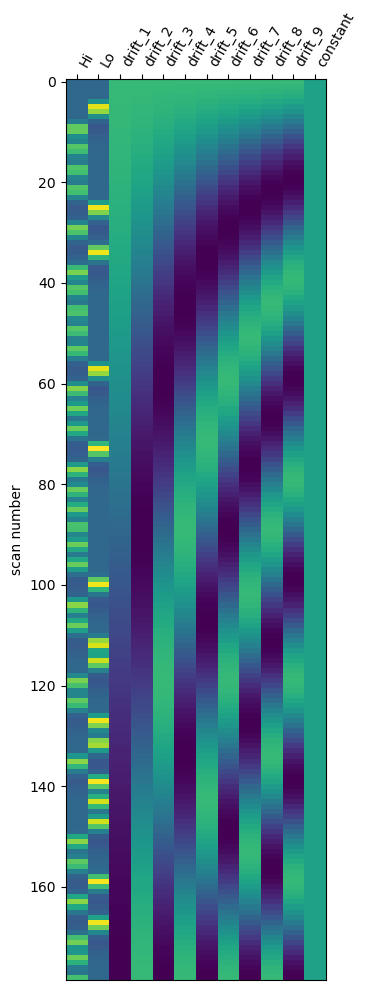

In [206]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

plt.show()

In [207]:
import os

outdir = "../results"
if not os.path.exists(outdir):
    os.mkdir(outdir)

from os.path import join

plot_design_matrix(
    design_matrix, output_file=join(outdir, "design_matrix.png")
)

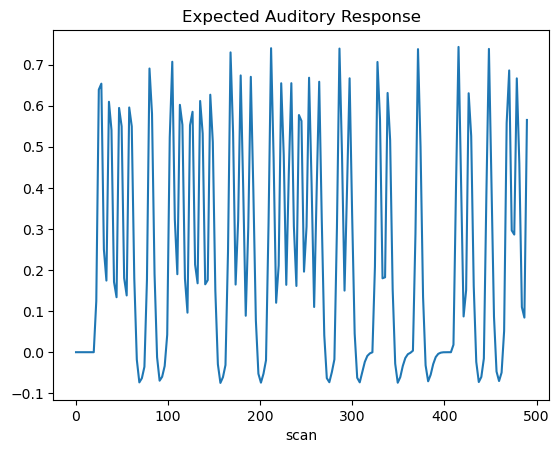

In [208]:
plt.plot(design_matrix["Hi"])
plt.xlabel("scan")
plt.title("Expected Auditory Response")
plt.show()

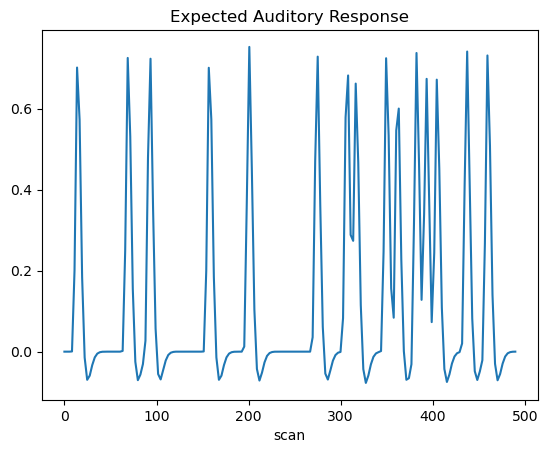

In [209]:
plt.plot(design_matrix["Lo"])
plt.xlabel("scan")
plt.title("Expected Auditory Response")
plt.show()

In [210]:
conditions = {"Hi": np.zeros(12), "Lo": np.zeros(12)}
conditions["Hi"][0] = 1
conditions["Lo"][1] = 1

In [211]:
Hi_minus_Lo = conditions["Hi"] - conditions["Lo"]

<Axes: label='conditions'>

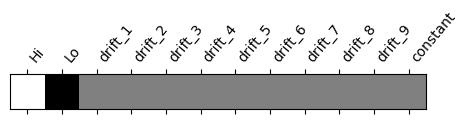

In [212]:
from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(Hi_minus_Lo, design_matrix=design_matrix)

In [213]:
eff_map = fmri_glm.compute_contrast(
    Hi_minus_Lo, output_type="effect_size"
)

In [214]:
z_map = fmri_glm.compute_contrast(Hi_minus_Lo, output_type="z_score")

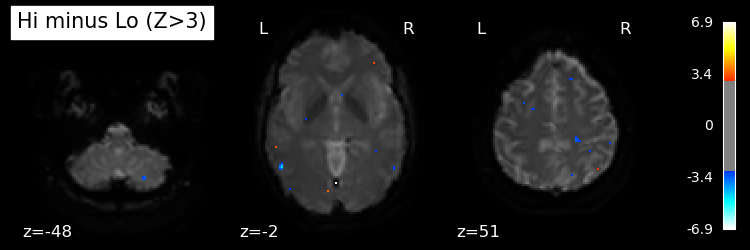

In [215]:
plot_stat_map(
    z_map,
    bg_img=fmri_img_mean,
    threshold=3.0,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Hi minus Lo (Z>3)",
)
plt.show()

Uncorrected p<0.001 threshold: 3.291


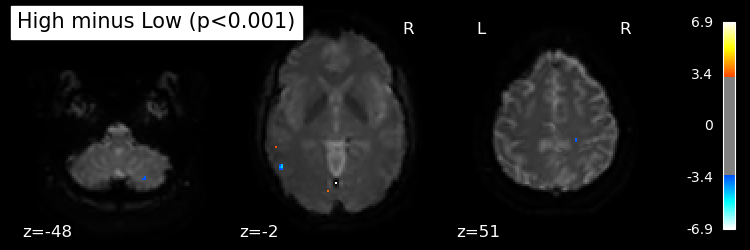

In [217]:
from nilearn.glm import threshold_stats_img

_, threshold = threshold_stats_img(z_map, alpha=0.001, height_control="fpr")
print(f"Uncorrected p<0.001 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=fmri_img_mean,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="High minus Low (p<0.001)",
)
plt.show()

In [223]:
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=5
)
table

/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/reporting/_get_clusters_table.py:338: UserWarning: Attention: No clusters with stat higher than 3.2905267314918945
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)


Bonferroni-corrected, p<0.05 threshold: 5.174


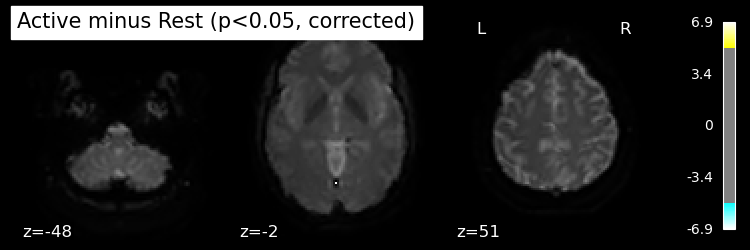

In [175]:
_, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"Bonferroni-corrected, p<0.05 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=fmri_img_mean,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (p<0.05, corrected)",
)
plt.show()

False Discovery rate = 0.05 threshold: 6.862


/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


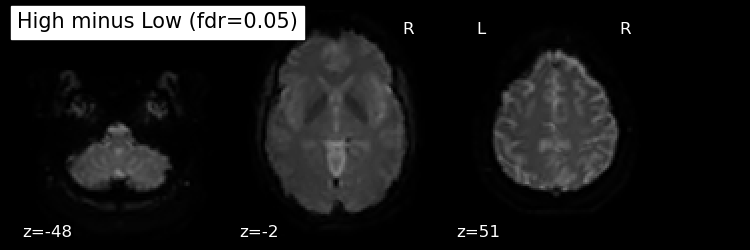

In [224]:
_, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="fdr")
print(f"False Discovery rate = 0.05 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=fmri_img_mean,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="High minus Low (fdr=0.05)",
)
plt.show()

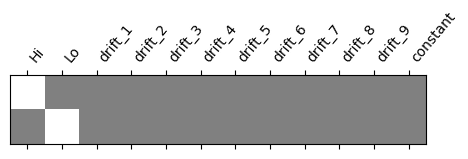

In [180]:
effects_of_interest = np.vstack((conditions["Hi"], conditions["Lo"]))
plot_contrast_matrix(effects_of_interest, design_matrix)
plt.show()

z_map = fmri_glm.compute_contrast(effects_of_interest, output_type="z_score")

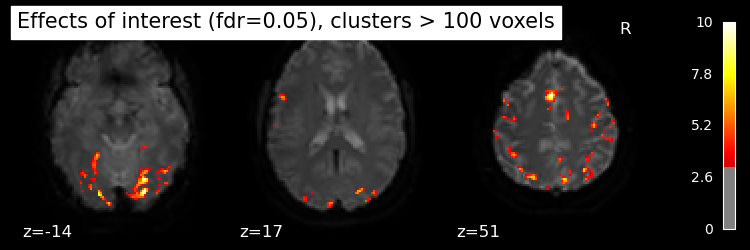

In [184]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=10
)
plot_stat_map(
    clean_map,
    bg_img=fmri_img_mean,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Effects of interest (fdr=0.05), clusters > 100 voxels",
)
plt.show()

In [185]:
table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=100
)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,25.5,-84.5,-14.5,10.417583,5360
1,1a,25.5,-72.5,-14.5,10.340306,
2,1b,35.5,-86.5,-16.5,9.055975,
3,1c,23.5,-68.5,-6.5,8.790181,
4,2,-4.5,11.5,51.5,10.363086,4704
5,2a,1.5,-2.5,63.5,9.105744,
6,2b,-2.5,11.5,41.5,7.459214,
7,2c,3.5,19.5,37.5,7.312259,
8,3,-46.5,-2.5,57.5,9.738066,1488
9,3a,-36.5,1.5,65.5,7.597420,


# TEST 2 : GLM 1st level

In [225]:
# repetition time, in seconds
tr = 2.75
# Sample at the beginning of each acquisition.
slice_time_ref = 0.0
# We use a discrete cosine transform to model signal drifts.
drift_model = "Cosine"
# The cutoff for the drift model is 0.01 Hz.
high_pass = 0.01
# The hemodynamic response function
hrf_model = "spm + derivative"

In [228]:
import warnings

from nilearn.image import concat_imgs, mean_img, resample_img

# Avoid getting too many warnings due to resampling
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmri_img = [
        concat_imgs(data['func'], auto_resample=True),
        concat_imgs(data['func'], auto_resample=True),
    ]
affine, shape = fmri_img[0].affine, fmri_img[0].shape
print("Resampling the second image (this takes time)...")
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])

Resampling the second image (this takes time)...


In [229]:
mean_image = mean_img(fmri_img)

In [230]:
from nilearn.glm.first_level import make_first_level_design_matrix

design_matrices = []

In [234]:
for idx, img in enumerate(fmri_img, start=1):
    # Build experimental paradigm
    n_scans = img.shape[-1]
    events = pd.read_table(data["events"][0])
    # Define the sampling times for the design matrix
    frame_times = np.arange(n_scans) * tr
    # Build design matrix with the reviously defined parameters
    design_matrix = make_first_level_design_matrix(
        frame_times,
        events,
        hrf_model=hrf_model,
        drift_model=drift_model,
        high_pass=high_pass,
    )

    # put the design matrices in a list
    design_matrices.append(design_matrix)

/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'value' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'onset_bid' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'value' in events data. It will be ignored.
  warn

In [235]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = {
    column: contrast_matrix[i]
    for i, column in enumerate(design_matrix.columns)
}

In [236]:
contrasts = {
    "High vs Low": basic_contrasts["Hi"] - basic_contrasts["Lo"],
    "Low vs Hi": -basic_contrasts["Hi"]
    + basic_contrasts["Lo"],
    "effects_of_interest": np.vstack(
        (basic_contrasts["Hi"], basic_contrasts["Lo"])
    ),
}

In [237]:
from nilearn.glm.first_level import FirstLevelModel

print("Fitting a GLM")
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrices)

Fitting a GLM


/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:75: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Computing contrasts
	contrast id: High vs Low


/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:706: UserWarning: One contrast given, assuming it for all 2 runs
  warn(f'One contrast given, assuming it for all {int(n_runs)} runs')


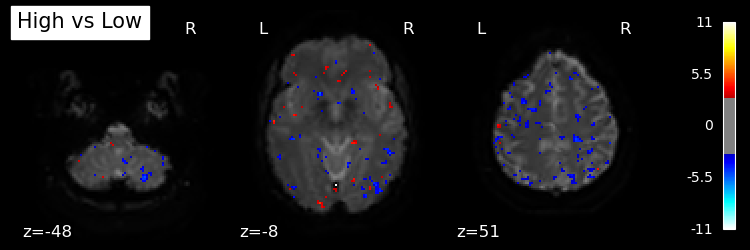

	contrast id: Low vs Hi


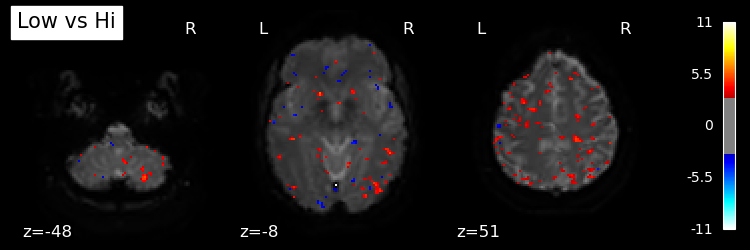

	contrast id: effects_of_interest


/home/jdaoust/miniconda3/lib/python3.10/site-packages/nilearn/glm/contrasts.py:348: UserWarning: Running approximate fixed effects on F statistics.
  warn('Running approximate fixed effects on F statistics.')


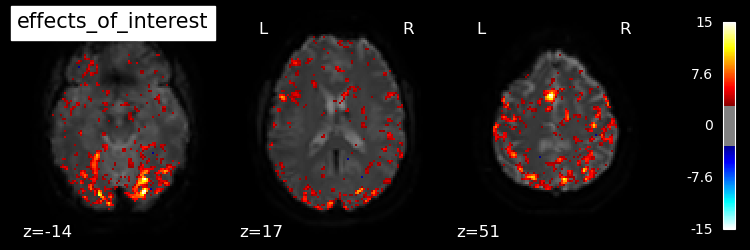

In [238]:
from nilearn import plotting

print("Computing contrasts")

# Iterate on contrasts
for contrast_id, contrast_val in contrasts.items():
    print(f"\tcontrast id: {contrast_id}")
    # compute the contrasts
    z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
    # plot the contrasts as soon as they're generated
    # the display is overlaid on the mean fMRI image
    # a threshold of 3.0 is used, more sophisticated choices are possible
    plotting.plot_stat_map(
        z_map,
        bg_img=mean_image,
        threshold=3.0,
        display_mode="z",
        cut_coords=3,
        black_bg=True,
        title=contrast_id,
    )
    plotting.show()